<a href="https://colab.research.google.com/github/ShoSato-047/STAT380/blob/main/ShoSato_Activity_3_(2025)_Poisson_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review
Recall the Poisson distribution is parameterized by $\lambda$, the rate of occurrences for a single time or space unit.  Given $\lambda$ we can find probabilities for $Y$, the number of occurrences in $t$ time or $A$ space units.  For $t$ time units:

$$P(Y=k) = \frac{e^{-\lambda t}(\lambda t)^k}{k!}; k=0,1,2,...$$


# Q1 (modified from Rosner ch 14)

Suppose the rate of allergic reactions in a certain population is constant over time.


## A

A person is selected randomly from the population and followed for 18 months.  If the true rate of allergic reactions is 5 per 100 person-years, what is the probability the subject will have at least one allergic reaction during the follow-up period?  To answer this:

* Define $Y$, the random variable.
  - **The number of allergic reactions one person has over 18 months**

* Define the distribution of $Y$ using $Y\sim$ notation.
  - **Y ~POI($\lambda$ * t) = POI(1.5 * 5/100) = POI(0.075)**
  <br>
  Where . . .
  - **$\lambda$ = 5/100 = 0.05**
  - **t = 18/12 months = 1.5 years**

* Find the required probability using `sum()` and `dpois()` or `ppois()`.
  - **P(Y >= 1) = 1 - P(Y = 0) = 7.2%**

In [5]:
# Find P(Y=0)
dpois(0, 0.075)

[1] 0.9277435

In [6]:
# Double checking
0.075^0 *exp(-0.075)/factorial(1)

[1] 0.9277435

In [ ]:
1 - ppois(0, 0.075)

[1] 0.07225651

## B

200 subjects living in a highly polluted area are followed for various lengths of time.  The average length of follow-up is 18 months.  Suppose that at the end of the study, the estimated rate $\hat\lambda$ is 7 per 100 person-years.  How many events must have been observed in order to yield this rate?

# **B - Answer**
**21 allergic reactions.**
<br>

**We observed a total of 300 person-years, to get a rate of 7/100 this must have meant we observed 21 allergic reactions. (Note that we would expect 15 over this amount of follow-up time if underlying rate is the same)**

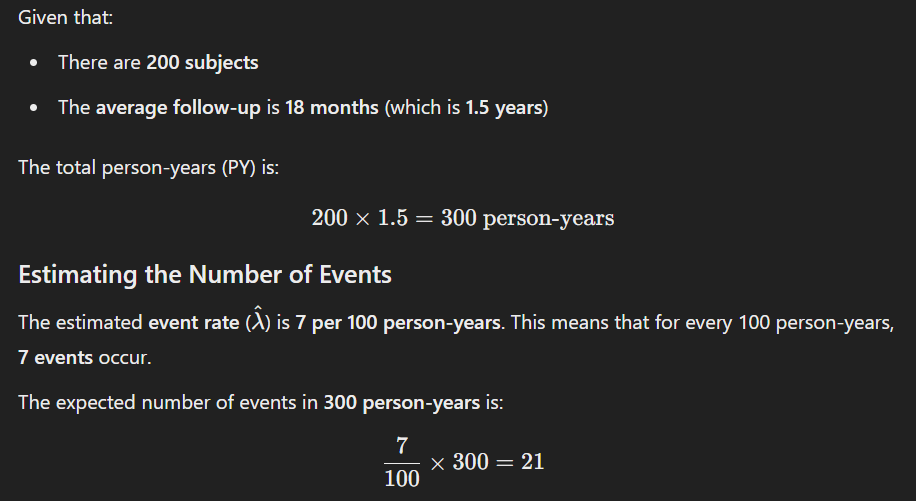

## C

Do the data from part B provide statistically significant evidence that the true rate $\lambda$ is higher than 5 per 100 person-years in this high-pollution area?  Explain.

**Want: P(Y >= 21) = 1 - P(Y <= 20)**
<br>
**ppois(k, mu)**
- mu = $\lambda$ * t
- mu = 5/100 * 300 = 5 * 3 = **15**

In [ ]:
# p-value
1 - ppois(20, 15)

[1] 0.08297091

# **C - Answer**
**This sample outcome is not sufficiently unusual to convince us that the rate of reactions has increased in this high-pollution area (p-value > 0.05)**

# Q2: Using a covariate to model $\lambda$

Use the wcgs data to estimate the rate of coronary heart disease (CHD) for the different behavioral types (note that the variable `time169` is the follow-up time measured in days; `chd69` indicates whether or not the individual had CHD; `dibpat` indicates the behavioral type).




In [ ]:
library(dplyr)
wcgs <- read.csv('https://www.dropbox.com/s/9n5s1by6e4uoic1/wcgs.csv?dl=1')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
2000/

In [ ]:
head(wcgs)

,age,arcus,behpat,bmi,chd69,chol,dbp,dibpat,height,id,⋯,ncigs,sbp,smoke,t1,time169,typchd69,uni,weight,wghtcat,agec
,<int>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<chr>
1,50,1,A1,31.32101,No,249,90,Type A,67,2343,⋯,25,132,Yes,-1.6333529,1367,0,0.4860738,200,170-200,46-50
2,51,0,A1,25.32858,No,194,74,Type A,73,3656,⋯,25,120,Yes,-4.0633659,2991,0,0.1859543,192,170-200,51-55
3,59,1,A1,28.69388,No,258,94,Type A,70,3526,⋯,0,158,No,0.6397287,2960,0,0.7277991,200,170-200,56-60
4,51,1,A1,22.14871,No,173,80,Type A,69,22057,⋯,0,126,No,1.1217681,3069,0,0.6244636,150,140-170,51-55
5,44,0,A1,22.31303,No,214,80,Type A,71,12927,⋯,0,126,No,2.4250107,3081,0,0.3789776,160,140-170,41-45
6,47,0,A1,27.11768,No,206,76,Type A,64,16029,⋯,80,116,Yes,-0.7875199,2114,0,0.7355005,158,140-170,46-50


## A

Use `summarize()` (and `group_by()`, if that's your style) from the `dplyr` package to find the amount of follow-up time and number of CHD events for each of the two behavioral pattern groups.

In [ ]:
# Where does 366.25 come from?
# 366.25 = the average number of days per year when accounting for leap years

(wcgs
  %>% mutate(chd_binary = ifelse(chd69=='No', 0, 1))
  %>% summarise(total_time = sum(time169), total_CHD = sum(chd_binary), .by = dibpat)
  %>% mutate(IR = (total_CHD/total_time)*366.25*1000) # events per 1000 person-years
)

dibpat,total_time,total_CHD,IR
<chr>,<int>,<dbl>,<dbl>
Type A,4152911,178,15.698025
Type B,4311981,79,6.710083


In [ ]:
(wcgs
  %>% summarise(total_time = sum(time169), total_CHD = n(), .by = c(dibpat, chd69))
  %>% mutate(total_follow_up_time = sum(total_time), .by = dibpat)
  %>% filter(chd69 =='Yes')
)

dibpat,chd69,total_time,total_CHD,total_follow_up_time
<chr>,<chr>,<int>,<int>,<int>
Type A,Yes,282075,178,4152911
Type B,Yes,143183,79,4311981


## B

Find $\hat \lambda_A$ = **15.66** and $\hat\lambda_B$ = **6.69**, the rates of CHD for those who are Type A and B, respectively.  Express your answer in events per 1000 person-years.

In [ ]:
# 15.66 events per 1000 person-years
# 6.69 events per 1000 person-years

## C

Ten Type A individuals are followed for up to 5 years each, until the individual either has the event or the 5 years are up, whichever come first.  Assuming a constant CHD rate over this period and using your estimate $\hat \lambda_A$, what is the estimated probability that nobody develops CHD?  

 - **If nobody develops CHD, everybody is followed for the full 5 years.**
 - **Which means we have 50 person-years of follow-up time (10 individuals x 5 years).**
 - **Y ~ POI($\lambda$ * t)**
 - **$\lambda$ = 15.66 person/1000 years (from part B)**
 - **t = 10 people X 5 years = 50 person/years**


**Y ~ POI(50*15.66/1000 = 0.783)**
<br>

**Want P(Y = 0) = 45.7%**

In [8]:
# Where am I getting this 1000?
50*15.66/1000

[1] 0.783

In [2]:
# incident rate
1-dpois(0, 0.783)

[1] 0.5429671

In [12]:
# probability
dpois(0, 0.783)

[1] 0.4570329

## D

Why can we not find $P(k\mbox{ out of 10 Type A individuals have CHD event in 5-year time window})$ for any $k\geq 1$ without more information?  What information would we need?

**The follow up time stops. We have to know what time we got CHD.**

## E

Ten Type B individuals are followed for 5 years each, until the individual either has the event or the 5 years are up, whichever come first.  Assuming a constant CHD rate over this period, what is the probability that none of these individuals develops CHD?  

**Want P(Y = 0) = 71.6%**

In [10]:
50*6.69/1000

[1] 0.3345

In [1]:
# incident rate
1-dpois(0, 0.3345)

[1] 0.2843042

In [11]:
# probability
dpois(0, 0.3345)

[1] 0.7156958

## F

How do your probabilities from C and E compare, and does this make sense given the estimated rates $\hat \lambda_A$ and $\hat \lambda_B$?

# F - Answer (2 ways of interpretaion):
**Type A has 54.3% incident rate. Whereas the type B has 28.4%.
Higher incident rate means higher probability of gettign CHD**
<br>

or

**Type B individuals have a higher propbability of NOT getting CHD (71.6%), compared to Type A individuals (45.7%) in a period of 5 years.**

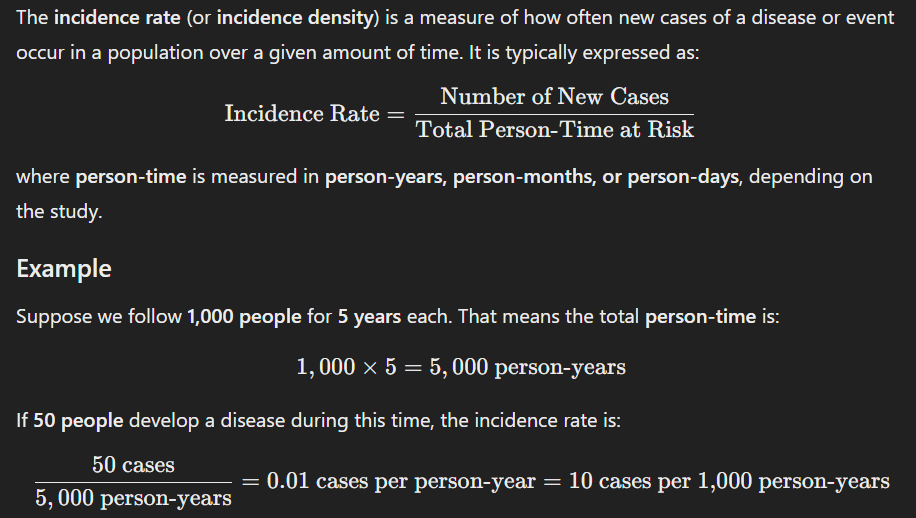

In [ ]:
# Questions I do not understand, email Dr. Bergen
# 1-B, 2-C, 2-F